In [79]:
import glob
import numpy as np
import shutil
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

In [80]:
path = "/Users/nduginets/PycharmProjects/master-diploma/isic2018/classifiers"

In [81]:
def get_vals(exec_type):
    items = glob.glob(os.path.join(path, exec_type + '*'))
    items = list(map(lambda x: os.path.join(x, 'test_metrics.json'), items))
    return items

In [82]:
classifier = get_vals("classifier_")
pix2pix = get_vals("pix_2pix_classifier_")

In [83]:
classifier_data = [json.loads("\n".join(open(i, "r").readlines())) for i in classifier]
classifier_data = [{int(k):v for k,v in d.items() } for d in classifier_data]

pix2pix_data = [json.loads("\n".join(open(i, "r").readlines())) for i in pix2pix]
pix2pix_data = [{int(k):v for k,v in d.items() } for d in pix2pix_data]

print(classifier_data[0])

{0: {'accuracy': 0.56875, 'globules': {'auc': 0.375, 'cm': [[3, 1], [1, 0]], 'f1_binary': 0.0, 'f1_macro': 0.375, 'f1_micro': 0.6}, 'loss': 0.02202412113547325, 'milia_like_cyst': {'auc': 0.75, 'cm': [[2, 2], [0, 1]], 'f1_binary': 0.5, 'f1_macro': 0.5833333333333333, 'f1_micro': 0.6}, 'negative_network': {'auc': 0.8333333333333334, 'cm': [[2, 1], [0, 2]], 'f1_binary': 0.8, 'f1_macro': 0.8, 'f1_micro': 0.8000000000000002}, 'pigment_network': {'auc': 0.75, 'cm': [[2, 2], [0, 1]], 'f1_binary': 0.5, 'f1_macro': 0.5833333333333333, 'f1_micro': 0.6}, 'streaks': {'auc': nan, 'cm': [[2, 3], [0, 0]], 'f1_binary': 0.0, 'f1_macro': 0.28571428571428575, 'f1_micro': 0.4000000000000001}}, 1: {'accuracy': 0.5625, 'globules': {'auc': 0.25, 'cm': [[2, 2], [1, 0]], 'f1_binary': 0.0, 'f1_macro': 0.28571428571428575, 'f1_micro': 0.4000000000000001}, 'loss': 0.02147780731320381, 'milia_like_cyst': {'auc': 0.375, 'cm': [[3, 1], [1, 0]], 'f1_binary': 0.0, 'f1_macro': 0.375, 'f1_micro': 0.6}, 'negative_networ

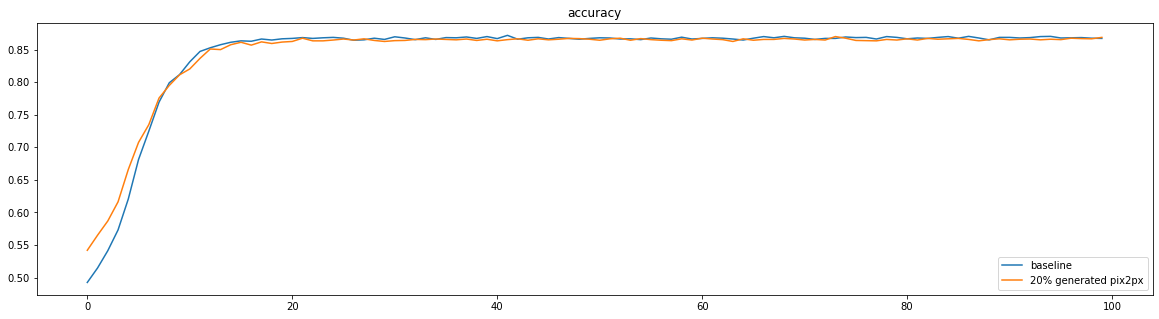

<Figure size 432x288 with 0 Axes>

In [84]:
x = [i for i in range(100)]
y_clf_acc = []
y_pix2pix_acc = []

for idx in range(100):
    avg_clf = []
    avg_pix = []
    for f_idx in range(20):
        avg_clf.append(classifier_data[f_idx][idx]['accuracy'])
        avg_pix.append(pix2pix_data[f_idx][idx]['accuracy'])
    y_clf_acc.append(np.mean(np.array(avg_clf)))
    y_pix2pix_acc.append(np.mean(np.array(avg_pix)))


plt.figure(figsize=(20, 5))
plt.title("accuracy")
plt.plot(x, y_clf_acc, label="baseline")
plt.plot(x, y_pix2pix_acc, label="20% generated pix2px")
plt.legend()
plt.show()
plt.clf()

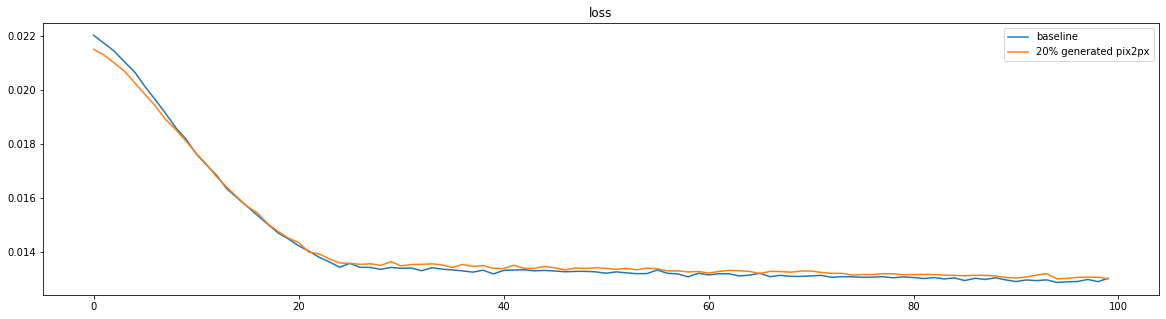

<Figure size 432x288 with 0 Axes>

In [85]:
x = [i for i in range(100)]
y_clf_acc = []
y_pix2pix_acc = []

for idx in range(100):
    avg_clf = []
    avg_pix = []
    for f_idx in range(20):
        avg_clf.append(classifier_data[f_idx][idx]['loss'])
        avg_pix.append(pix2pix_data[f_idx][idx]['loss'])
    y_clf_acc.append(np.mean(np.array(avg_clf)))
    y_pix2pix_acc.append(np.mean(np.array(avg_pix)))


plt.figure(figsize=(20, 5))
plt.title("loss")
plt.plot(x, y_clf_acc, label="baseline")
plt.plot(x, y_pix2pix_acc, label="20% generated pix2px")
plt.legend()
plt.show()
plt.clf()

In [86]:
def get_stat(dec_name):
    x = [i for i in range(100)]
    measures = ['auc', 'f1_binary', 'f1_micro', 'f1_macro']
    y_clf_acc = {k:[] for k in measures}
    y_pix2pix_acc = {k:[] for k in measures}

    for m in measures:
        for idx in range(100):
            avg_clf = []
            avg_pix = []
            for f_idx in range(20):
                avg_clf.append(classifier_data[f_idx][idx][dec_name][m])
                avg_pix.append(pix2pix_data[f_idx][idx][dec_name][m])
            y_clf_acc[m].append(np.mean(np.array(avg_clf)))
            y_pix2pix_acc[m].append(np.mean(np.array(avg_pix)))

    fig, axs = plt.subplots(4, figsize=(20, 10))
    fig.suptitle(dec_name)
    for idx, m in enumerate(measures):
        axs[idx].plot(x, y_clf_acc[m], label="{} baseline".format(m))
        axs[idx].plot(x, y_pix2pix_acc[m], label="{} 20% generated pix2px".format(m))
        axs[idx].set_title(m)
    plt.legend()
    plt.show()
    plt.clf()

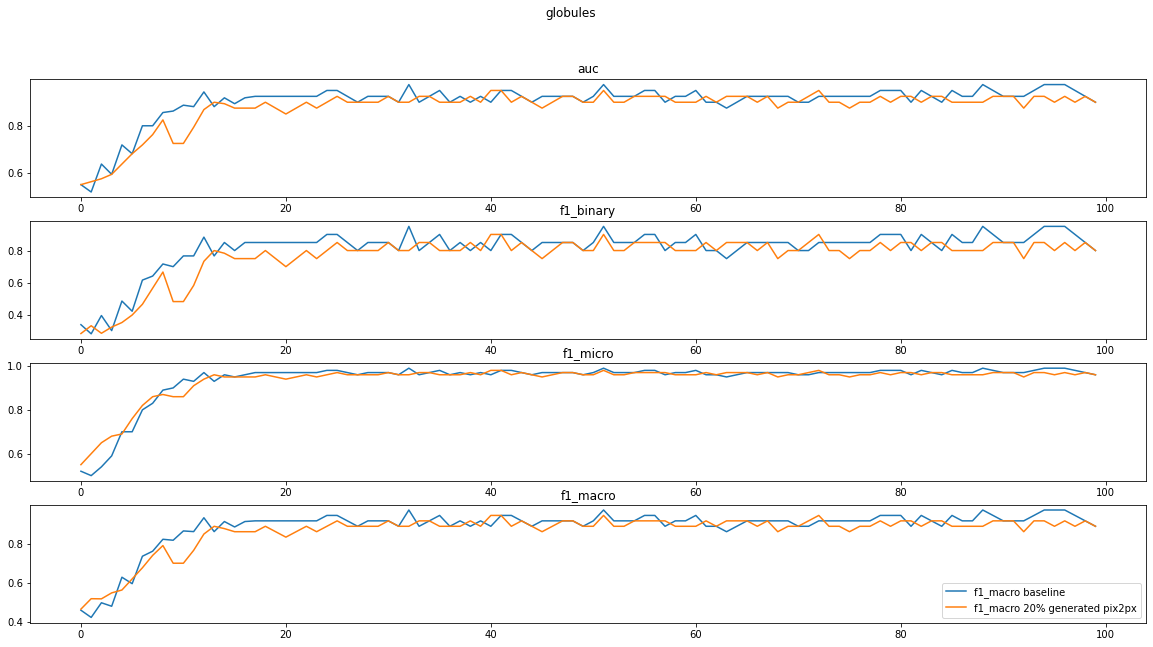

<Figure size 432x288 with 0 Axes>

In [87]:
get_stat('globules')

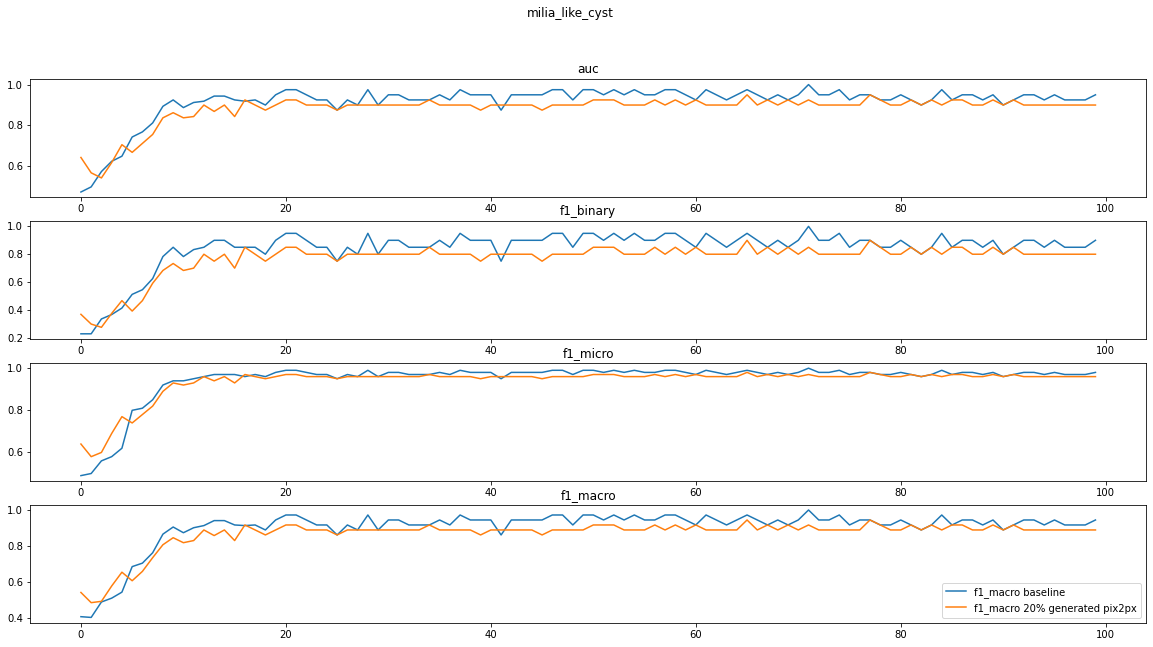

<Figure size 432x288 with 0 Axes>

In [88]:
get_stat('milia_like_cyst')

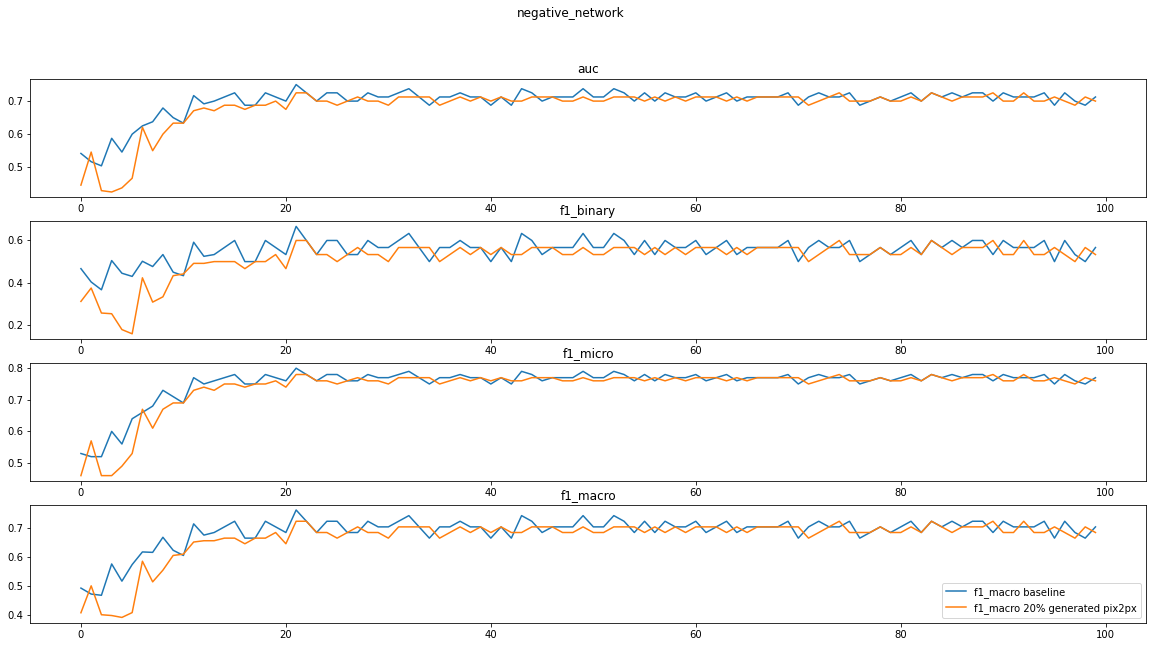

<Figure size 432x288 with 0 Axes>

In [89]:
get_stat('negative_network')

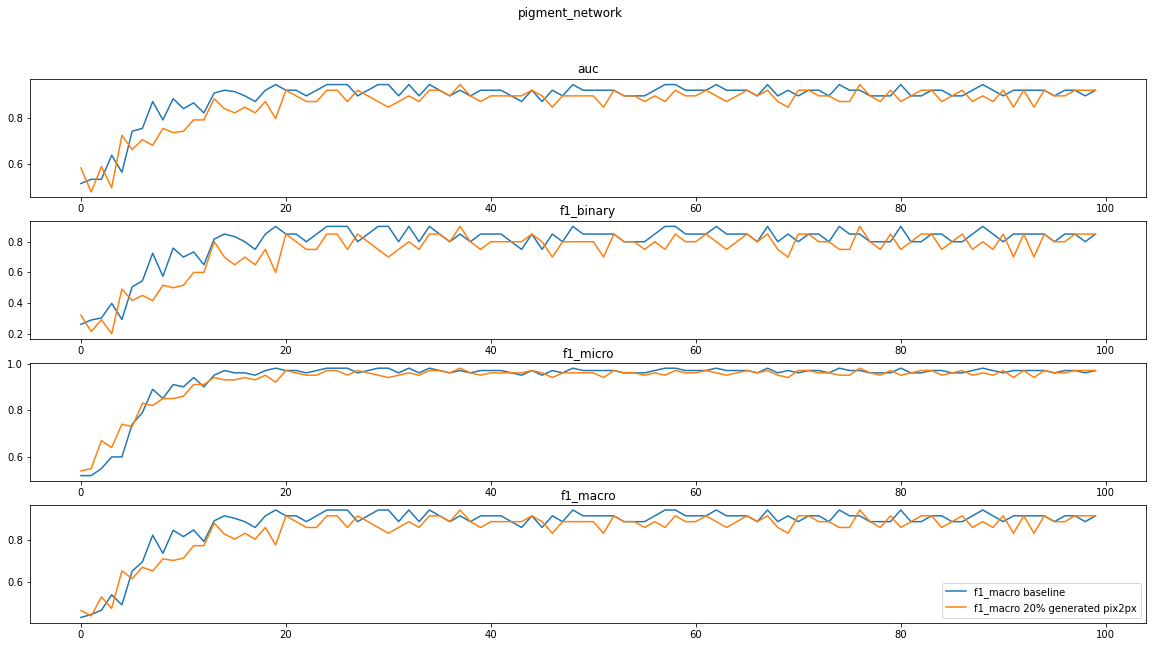

<Figure size 432x288 with 0 Axes>

In [90]:
get_stat('pigment_network')

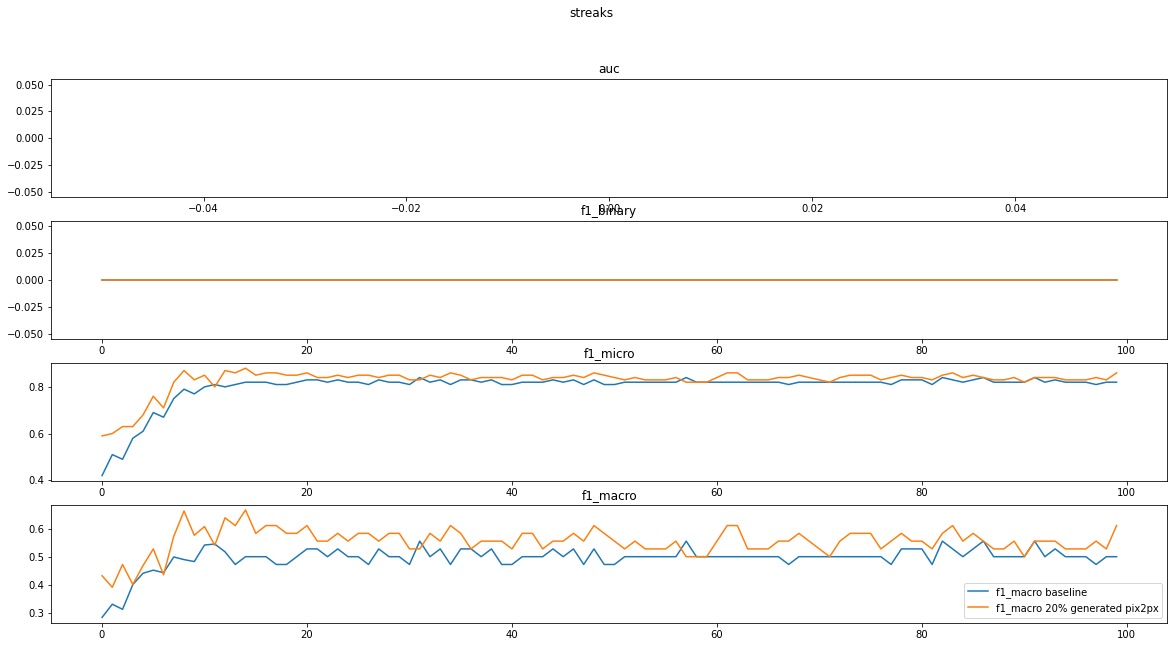

<Figure size 432x288 with 0 Axes>

In [91]:
get_stat('streaks')